In [28]:
import matplotlib.pyplot as plt
from PIL import Image
import os, json
from skimage.segmentation import slic
from torchvision import transforms, models
import torch.nn.functional as F

import torch
import numpy as np

In [29]:
img = Image.open('data/cheetah3.png')
resize_image = transforms.Resize((224,224))
img = resize_image(img)
img = img.convert("RGB")
img_orig = np.asarray(img, dtype=np.float32) / 255
img_orig = img_orig[:, :, :3]
img_orig = np.transpose(img_orig, (2,0,1))

((3, 224, 224), (1, 3, 224, 224))

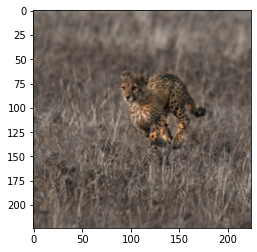

In [30]:
plt.imshow(img)
img_orig.shape, np.expand_dims(img_orig, axis=0).shape

In [31]:
segments_slic = slic(img, n_segments=50, compactness=30, sigma=3)
segments_slic.shape

(224, 224)

In [32]:
model = models.vgg16(pretrained=True)


In [33]:
model = models.vgg16(pretrained=True)

def batch_predict(images):
    print("==================inside batch_predict_t==================")
    model.eval()
    images = torch.from_numpy(images)
    images = [images]
    batch = torch.stack(tuple(i for i in images), dim=0)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    batch = batch.to(device)
    
    logits = model(batch)
    probs = F.softmax(logits, dim=1)
    print(probs.shape)
    print("==================outside batch_predict_t==================")
    return probs.detach().cpu().numpy()

In [34]:
test_pred = batch_predict(img_orig)
test_pred.shape


==================inside batch_predict_t==================
torch.Size([1, 1000])
==================outside batch_predict_t==================


(1, 1000)

In [35]:
# define a function that depends on a binary mask representing if an image region is hidden
def mask_image(zs, segmentation, image, background=None):
    if background is None:
        background = image.mean((0,1))
    out = np.zeros((zs.shape[0], image.shape[0], image.shape[1], image.shape[2]))
    for i in range(zs.shape[0]):
        out[i,:,:,:] = image
        for j in range(zs.shape[1]):
            if zs[i,j] == 0:
                out[i][segmentation == j,:] = background
    return out


In [85]:
masked_image = np.float32(mask_image(zs=np.zeros((1,50)), 
                          segmentation=segments_slic, 
                          image=np.transpose(img_orig, (2,1,0)), 
                          background=255).squeeze())


In [76]:
(masked_image / 255)[np.where(masked_image[:1]) != 255]


array([[[1., 1., 1., ..., 1., 1., 1.]]], dtype=float32)

In [86]:
#masked_image.resize((1, 224*224*3))

In [87]:
masked_image.shape

(224, 224, 3)

In [91]:
masked_image[2]

array([[255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
 

In [79]:
matrix = np.ndarray([4, 5])
matrix[0,:] = range(1,6)
matrix[1,:] = range(6,11)
matrix[2,:] = range(11,16)
matrix[3,:] = range(16,21)

In [80]:
matrix[np.where((1 <= matrix[:,0]) & (matrix[:,0] <= 6)
       & (2 <= matrix[:,1]) & (matrix[:,1] <= 7))]

array([[ 1.,  2.,  3.,  4.,  5.],
       [ 6.,  7.,  8.,  9., 10.]])

(4, 5)